In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import collections

C:\Programs\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Dataset import
============

*Iris*
---------------------------

In [2]:
def import_iris_dataset():
    data = datasets.load_iris()

    target = data.target
    data = data.data
#     print("----------------Dane Wejściowe--------------------")
#     print(data[0])
#     print(data[1])
#     print(data[2])
#     print(data[3])

    return data, target

*Glass*
---------------------------

In [3]:
def import_glass_dataset():
    data = np.loadtxt('Datasets/Glass/glass.data', delimiter=',')
    target = []
    for x in data:
        target.append(x[-1])
    data = data[:,:-1]
    target = np.asarray(target)

    return data, target

*Diabetes*
---------------------------

In [4]:
def import_diabetes_dataset():
    data = np.loadtxt('Datasets/PrimaIndiansDiabetes/pima-indians-diabetes.csv', delimiter=',')
    target = []
    for x in data:
        target.append(x[-1])
    data = data[:,:-1]
    target = np.asarray(target)

    return data, target

*Wine*
---------------------------

In [5]:
def import_wine_dataset():
    data = datasets.load_wine()
    
    target = data.target
    data = data.data
    
    return data, target

*User Knowledge*
---------------------------

In [23]:
def import_knowledge_dataset():
    data = np.loadtxt('Datasets/user-knowledge.csv', delimiter=',')
    target = []
    for x in data:
        target.append(x[-1])
    data = data[:,:-1]
    target = np.asarray(target)

    return data, target

Discretiazation
============

In [6]:
def mean_of_bin(min_value, max_value, cutoffs):
    means = [(min_value + cutoffs[0]) / 2]
    for x in range(0, len(cutoffs)- 1):
        means.append((cutoffs[x] + cutoffs[x+1]) / 2)
    means.append((cutoffs[-1] + max_value) / 2)
    return means

In [7]:
def adjust_value(data, means):
    for i, r in enumerate(data):
        data[i] = means[int(data[i])]
    return data   

*Discretize by Frequency*
---------------------------

In [8]:
def freqenty_discretize(data, bins):
    min_value = np.min(data)
    max_value = np.max(data)
    split = np.array_split(np.sort(data), bins)
    cutoffs = [x[-1] for x in split]
    cutoffs = cutoffs[:-1]
    discrete = np.digitize(data, cutoffs, right=True)

    return discrete, cutoffs, min_value, max_value

In [9]:
def freqenty_discretization(data, bins_N, color, plot):
    unzip_lst = zip(*data)
    for index, i in enumerate(unzip_lst):
        discrete_dat, cutoff, min_value, max_value = freqenty_discretize(i, bins_N)
#         print("----------------Kubeczki--------------------")
#         print(discrete_dat)
        
#         print("-------Means-------------")
        means = mean_of_bin(min_value, max_value, cutoff)
#         print(means)
        
#         print("----------------Kubeczki z wartości średnich--------------------") 
        discrete_dat = np.array(discrete_dat, dtype=float)
        discrete_dat = adjust_value(discrete_dat, means)
#         print(discrete_dat)
                
        discrete_data = np.array(discrete_dat)
        discrete_data = discrete_data[:,np.newaxis]   

        if index == 0:
            discreted_data = np.copy(discrete_data)
        else: 
            discreted_data = np.append(discreted_data, discrete_data, axis=1)
  
        counter = collections.Counter(discrete_data[:,0])
        counter = sorted(counter.items())
        labels, values = zip(*counter)
        if plot == True:
            plot_bar_diagram(labels, values, color)            
            
    return discreted_data

*Discretize by Equal*
---------------------------

In [10]:
def equal_discretize(data, bins):
    min_value = np.min(data)
    max_value = np.max(data)
    
    cutoffs = []
    width = (max(data) - min(data))/bins
    for x in range(1, bins):
        cutoffs.append(min(data)+x*width)
    discrete = np.digitize(data, cutoffs, right=True)
    return discrete, cutoffs, min_value, max_value

In [11]:
def equal_discretization(data, bins_N, color, plot):
    unzip_lst = zip(*data)
    for index, i in enumerate(unzip_lst):
        discrete_dat, cutoff, min_value, max_value = equal_discretize(i, bins_N)
        means = mean_of_bin(min_value, max_value, cutoff)
        
        discrete_dat = np.array(discrete_dat, dtype=float)
        discrete_dat = adjust_value(discrete_dat, means)
        
        discrete_data = np.array(discrete_dat)
        discrete_data = discrete_data[:,np.newaxis]

        if index == 0:
            discreted_data = np.copy(discrete_data)
        else: 
            discreted_data = np.append(discreted_data, discrete_data, axis=1)

        counter = collections.Counter(discrete_data[:,0])
        counter = sorted(counter.items())
        labels, values = zip(*counter)
        if plot == True:
            plot_bar_diagram(labels, values, color)

    return discreted_data

*Discretize using Histogram*
---------------------------

In [12]:
def histogram_discretize(data):
    min_value = np.min(data)
    max_value = np.max(data)
    
    _, bin = np.histogram(data, bins='auto')
    bins = np.delete(bin, 0)
    discrete = np.digitize(data, bins, right=True)
    return discrete, bin, min_value, max_value

In [13]:
def histogram_discretization(data, color, plot):
    unzip_lst = zip(*data)
    for index, i in enumerate(unzip_lst):
        discrete_dat, bin, min_value, max_value = histogram_discretize(i)

        means = mean_of_bin(min_value, max_value, bin)
        discrete_dat = np.array(discrete_dat, dtype=float)
        discrete_dat = adjust_value(discrete_dat, means)
        
        discrete_data = np.array(discrete_dat)
        discrete_data = discrete_data[:,np.newaxis]

        
        if index == 0:
            discreted_data = np.copy(discrete_data)
        else: 
            discreted_data = np.append(discreted_data, discrete_data, axis=1)

        counter = collections.Counter(discrete_data[:,0])
        counter = sorted(counter.items())
        labels, values = zip(*counter)
        if plot == True:
            plot_bar_diagram(labels, values, color)    
    
    return discreted_data

*Discretization Histogram Diagram*
---------------------------

In [14]:
def plot_bar_diagram(labels, values, color):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(7, 4))

    ax.set_ylabel('Number of elements')
    ax.set_xlabel('Bin value')
#     ax.set_title('Discretization Bin Diagram')

    y = values

    # bar graphs
    x = np.arange(len(labels))

    width = 0.9
    ax.bar(x, y, width, color=color)
    ax.set_xticks(x)
    labels = list(labels)
    for i, element in enumerate(labels):
        labels[i] = round(element, 2)

    ax.set_xticklabels(labels)
    plt.show()

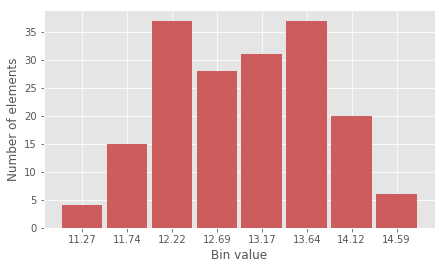

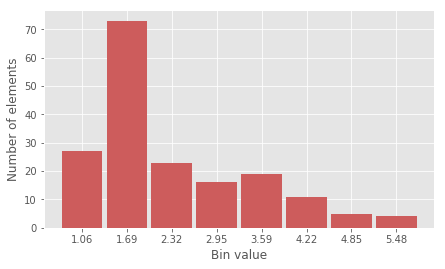

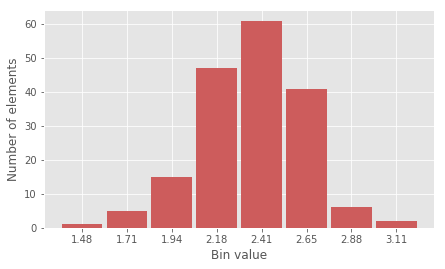

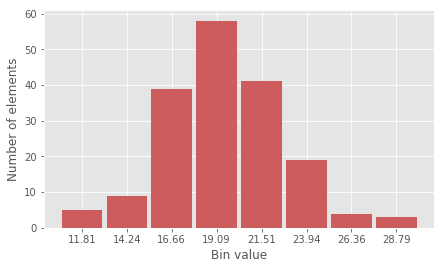

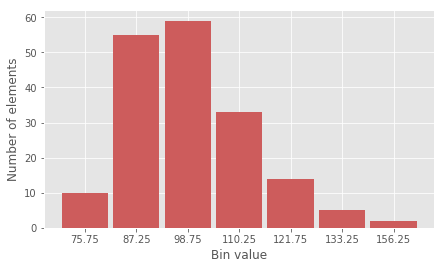

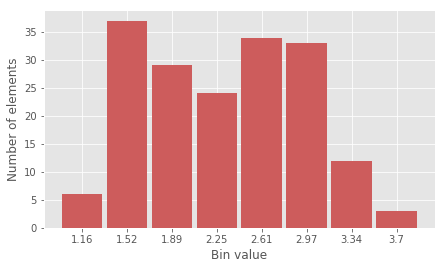

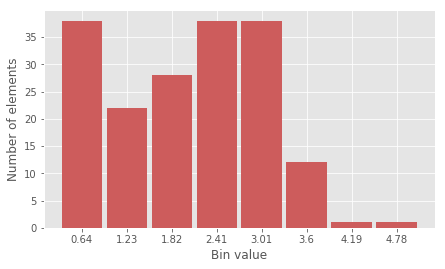

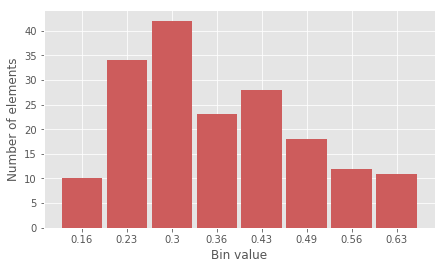

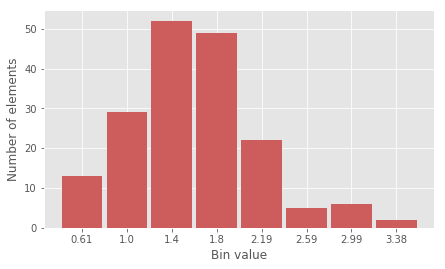

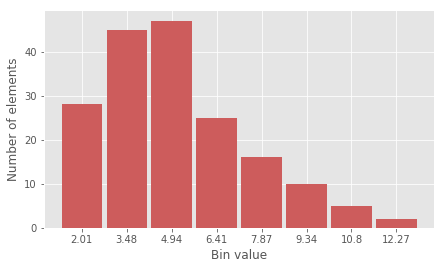

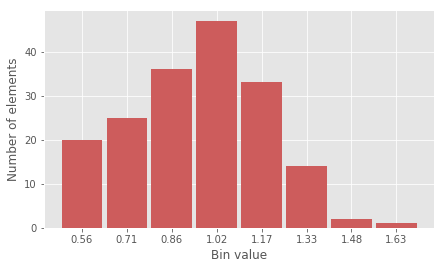

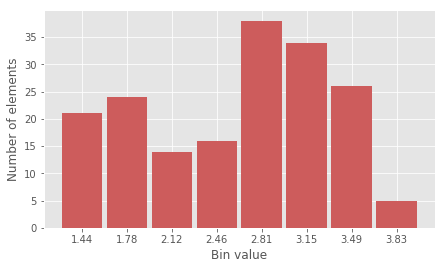

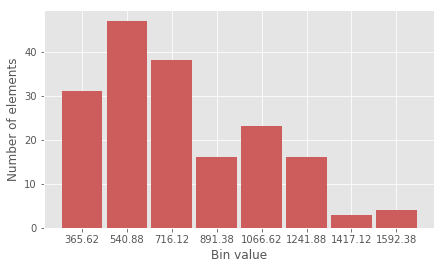

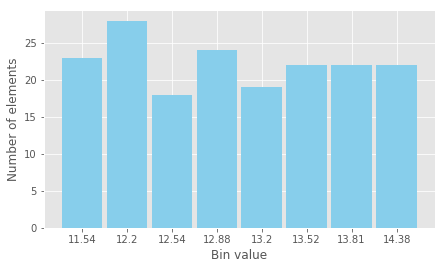

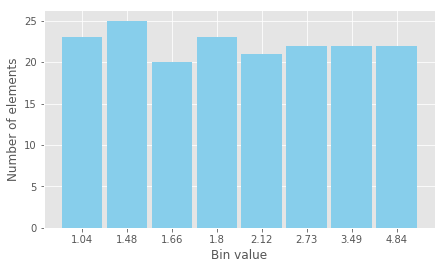

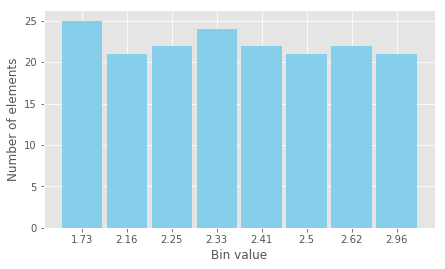

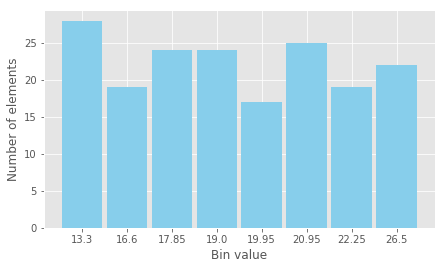

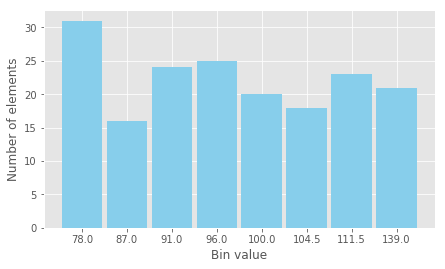

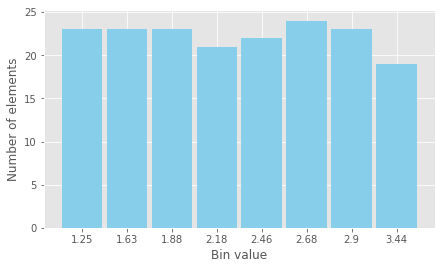

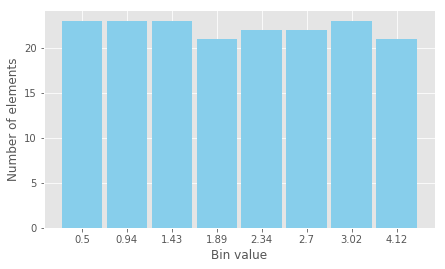

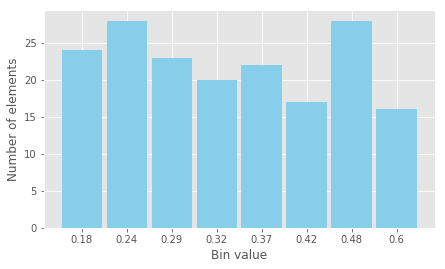

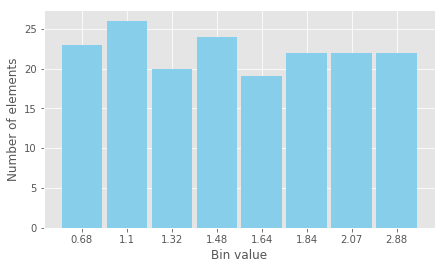

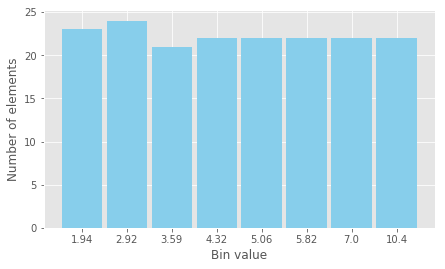

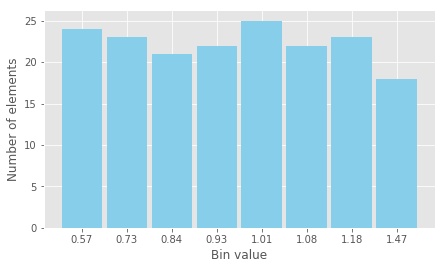

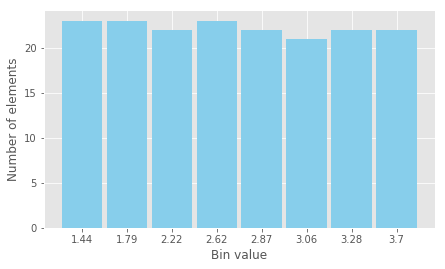

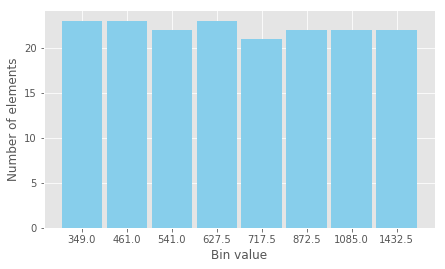

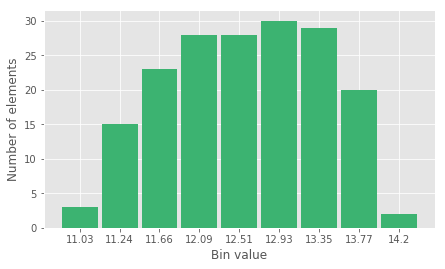

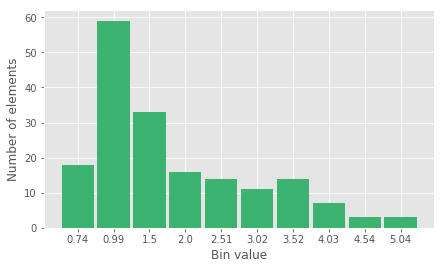

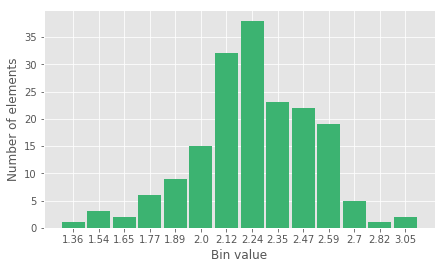

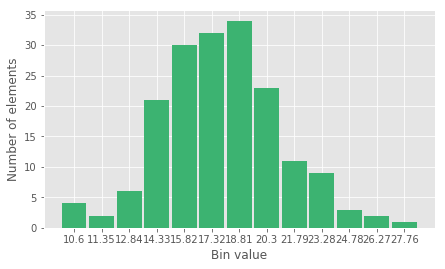

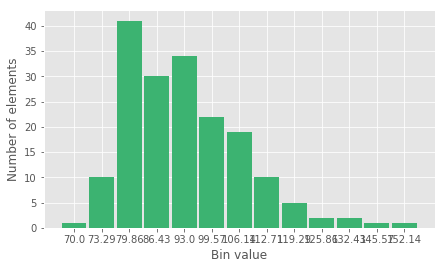

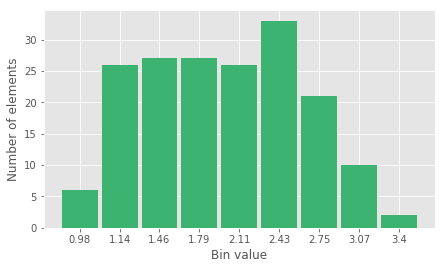

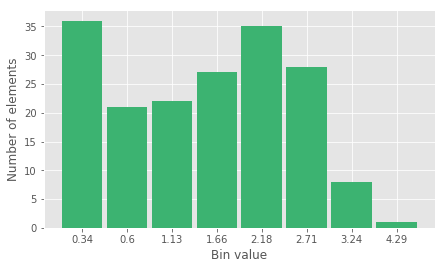

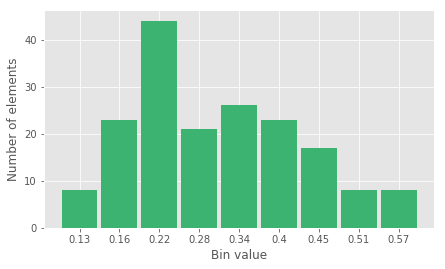

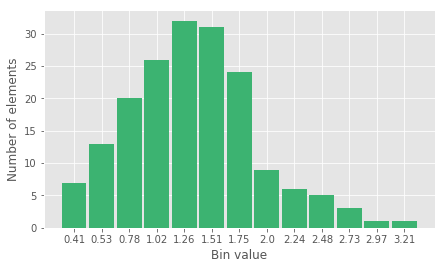

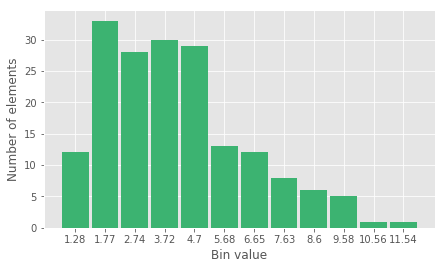

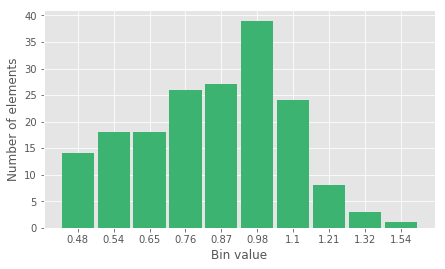

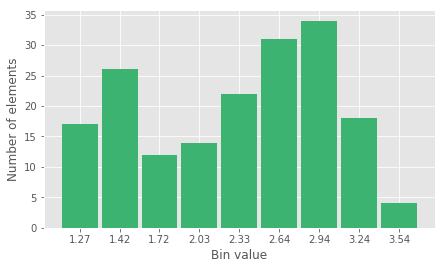

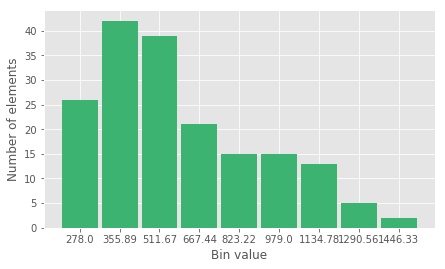

array([[1.37744444e+01, 9.93000000e-01, 2.35343750e+00, ...,
        9.83181818e-01, 3.54500000e+00, 9.79000000e+02],
       [1.29300000e+01, 1.49900000e+00, 2.00281250e+00, ...,
        9.83181818e-01, 3.24166667e+00, 8.23222222e+02],
       [1.29300000e+01, 2.00500000e+00, 2.58718750e+00, ...,
        8.71363636e-01, 2.93833333e+00, 9.79000000e+02],
       ...,
       [1.29300000e+01, 3.52300000e+00, 2.11968750e+00, ...,
        4.80000000e-01, 1.27000000e+00, 6.67444444e+02],
       [1.29300000e+01, 2.00500000e+00, 2.23656250e+00, ...,
        5.35909091e-01, 1.42166667e+00, 6.67444444e+02],
       [1.37744444e+01, 3.52300000e+00, 2.58718750e+00, ...,
        5.35909091e-01, 1.42166667e+00, 3.55888889e+02]])

In [15]:
bins_N = 8
data, target = import_wine_dataset()
# data, target = import_glass_dataset()
# data, target = import_glass_dataset()


equal_discretization(data, bins_N, 'IndianRed', True)
freqenty_discretization(data, bins_N, 'SkyBlue', True)
histogram_discretization(data, 'mediumseagreen', True)

Klasyfikatory (Gaussowski i Multinomial)
---------------

In [16]:
def gauss_classificator(X_train, X_test, Y_train, Y_test):
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print (classification_report(Y_test, Y_pred))
    return clf, Y_pred

def multinomial_classificator(X_train, X_test, Y_train, Y_test):
    clf = MultinomialNB()
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print (classification_report(Y_test, Y_pred))
    return clf, Y_pred

Confusion Matrix Generator
---------------

In [17]:
def confusion_matrix_generator(Y_test, Y_pred):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    img = plt.matshow(cm, cmap=plt.cm.autumn)
    plt.colorbar(img, fraction=0.045)
    for x in range(cm.shape[0]):
        for y in range(cm.shape[1]):
            plt.text(x, y, "%0.2f" % cm[x,y], 
                     size=12, color='black', ha="center", va="center")
    plt.show()

K-Fold vs Stratified K-Fold Diagram
==================

In [20]:
folds_number = [2, 5, 10, 20, 30, 50]
f1_kfold_score = []
f1_stratified_kfold_score = []

for i in folds_number:
    scores = cross_validation_test(data, target, KFold(n_splits=i), True)
    f1_kfold_score.append(return_f1_macro_mean_score(scores))
    print(return_f1_macro_mean_score(scores))
    scores = cross_validation_test(data, target, StratifiedKFold(n_splits=i), True)
    f1_stratified_kfold_score.append(return_f1_macro_mean_score(scores))
    print(return_f1_macro_mean_score(scores))
    print("")


0.8625804716233729
0.8625804716233729

0.8625804716233729
0.8625804716233729

0.8625804716233729
0.8625804716233729

0.8625804716233729
0.8625804716233729

0.8625804716233729
0.8625804716233729

0.8625804716233729
0.8625804716233729



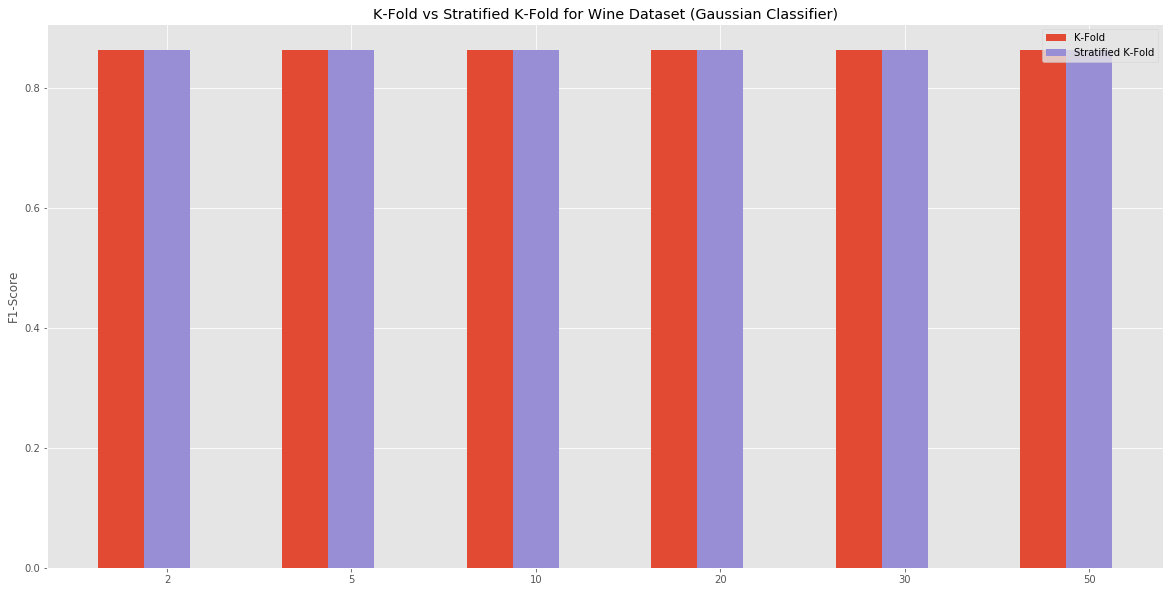

In [21]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylabel('F1-Score')
ax.set_title('K-Fold vs Stratified K-Fold for Wine Dataset (Gaussian Classifier)')

y1 = f1_kfold_score
y2 = f1_stratified_kfold_score

# bar graphs
x = np.arange(len(folds_number))

width = 0.25
ax.bar(x, y1, width, label='K-Fold')
ax.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[2]['color'], label='Stratified K-Fold')
ax.set_xticks(x + width)
ax.set_xticklabels(folds_number)
ax.legend()

plt.show()

In [19]:
def cross_validation_test(data, target, cv, clf):
    if clf == True:
        clf = MultinomialNB()
    else:
        clf = GaussianNB()
    toReturn = 0
    cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(clf, data, target,
                            cv=cv, scoring=scoring, return_train_score=False)
    return scores
    
def print_cross_validation_test(scores):
    for key, score in scores.items():
#         print('{}: {:.3f}'.format(key, np.mean(score)))
        print('{:.3f}'.format(np.mean(score)))

def return_f1_macro_mean_score(scores):
    for key, score in scores.items():
        if key == 'test_f1_macro':
            return np.mean(score)

Wine - F1-Score, KFold & Discretization ways
==================

In [30]:
data, target = import_knowledge_dataset()
bins_N = 8   
# data =  equal_discretization(data, bins_N, 'IndianRed', False)
# data = freqenty_discretization(data, bins_N, 'SkyBlue', False)
#data = histogram_discretization(data, 'mediumseagreen', False)

folds_number = [2, 4, 6, 8, 10]


scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), False)
print(return_f1_macro_mean_score(scores))
        

0.8987074833155841


In [ ]:
bins_N = 10   


data, target = import_iris_dataset()    
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), False)
print(return_f1_macro_mean_score(scores))

data, target = import_iris_dataset()
data =  equal_discretization(data, bins_N, 'IndianRed', False)
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), True)
print(return_f1_macro_mean_score(scores))

data, target = import_iris_dataset()
data = freqenty_discretization(data, bins_N, 'SkyBlue', False)
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), True)
print(return_f1_macro_mean_score(scores))

data, target = import_iris_dataset()
data = histogram_discretization(data, 'mediumseagreen', False)
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), True)
print(return_f1_macro_mean_score(scores))

data, target = import_iris_dataset()
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), True)
print(return_f1_macro_mean_score(scores))


In [ ]:
bins_N = 8   


data, target = import_wine_dataset()    
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), False)
print_cross_validation_test(scores)
print("")
data, target = import_wine_dataset() 
data =  equal_discretization(data, bins_N, 'IndianRed', False)
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), True)
print_cross_validation_test(scores)
print("")
data, target = import_wine_dataset() 
data = freqenty_discretization(data, bins_N, 'SkyBlue', False)
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), True)
print_cross_validation_test(scores)
print("")
data, target = import_wine_dataset() 
data = histogram_discretization(data, 'mediumseagreen', False)
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), True)
print_cross_validation_test(scores)
print("")
data, target = import_wine_dataset() 
scores = cross_validation_test(data, target, StratifiedKFold(n_splits=9), True)
print_cross_validation_test(scores)
print("")

In [ ]:
# data, target = import_diabetes_dataset()

# # data = freqenty_discretization(data, bins_N)
# data = equal_discretization(data, bins_N)
# # data = histogram_discretization(data)

# X_train, X_test, Y_train, Y_test = train_and_test_splitting(data, target, test_size)

# # clf, Y_pred = gauss_classificator(X_train, X_test, Y_train, Y_test)
# clf, Y_pred = multinomial_classificator(X_train, X_test, Y_train, Y_test)

# confusion_matrix_generator(Y_test, Y_pred)

# data, target = import_diabetes_dataset()

# # data = freqenty_discretization(data, bins_N)
# # data = equal_discretization(data, bins_N)
# data = histogram_discretization(data)

# X_train, X_test, Y_train, Y_test = train_and_test_splitting(data, target, test_size)

# # clf, Y_pred = gauss_classificator(X_train, X_test, Y_train, Y_test)
# clf, Y_pred = multinomial_classificator(X_train, X_test, Y_train, Y_test)

# confusion_matrix_generator(Y_test, Y_pred)